In [1]:
import numpy as np
import pandas as pd

from pathlib import Path

import sys

sys.path.append('../src')

import warnings
warnings.filterwarnings("ignore")

### Test focal region similarity

In [2]:
from Classes.experimental import FocalRegion

In [3]:
region = np.array([[1, 0], [0, 1]])
fra = FocalRegion(region)
fra.debug = True

history = np.array([[1, 0], [0, 1]])
print('History:\n', history)
print('-'*60)
scores = fra.get_similarity_scores(history)
print('Scores:\n', scores)
print('-'*60)

History:
 [[1 0]
 [0 1]]
------------------------------------------------------------
Cicle from column 0:
[[1 0]
 [0 1]]
Similarity score: 1.0
Cicle from column 1:
[[0 1]
 [1 0]]
Similarity score: 0.0
Scores:
 [np.float64(1.0), np.float64(0.0)]
------------------------------------------------------------


### Test FRA agents

In [4]:
from Classes.bar import Bar
from Utils.interaction import Episode
from Classes.experimental import FocalRegionAgent, SetFocalRegions

In [5]:
free_parameters = {
    'inverse_temperature': 10,
    'len_history': 2,
    'max_regions': 5
}
fixed_parameters = {
    'num_agents': 7,
    'threshold': 0.7,
}
n = 1

In [6]:
# Create the environment
bar = Bar(
    num_agents=fixed_parameters['num_agents'],
    threshold=fixed_parameters['threshold']
)
# Create the agents
agents = [FocalRegionAgent(free_parameters, fixed_parameters, n) for n in range(fixed_parameters['num_agents'])]
# Create the episode
episode = Episode(
    model='FRA',
    agents=agents,
    environment=bar,
    num_rounds=20
)

In [7]:
print('Focal regions:')
print(episode.agents[0].sfr)

Focal regions:
------------------------------------------------------------
[[0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 1. 1. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0. 1. 0.]
 [1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 1. 1.]]
------------------------------------------------------------------------------------------------------------------------
[[0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 0. 1.]
 [0. 1

In [8]:
# episode.agents[0].debug = True
# episode.agents[1].debug = True
episode.run()

<Axes: >

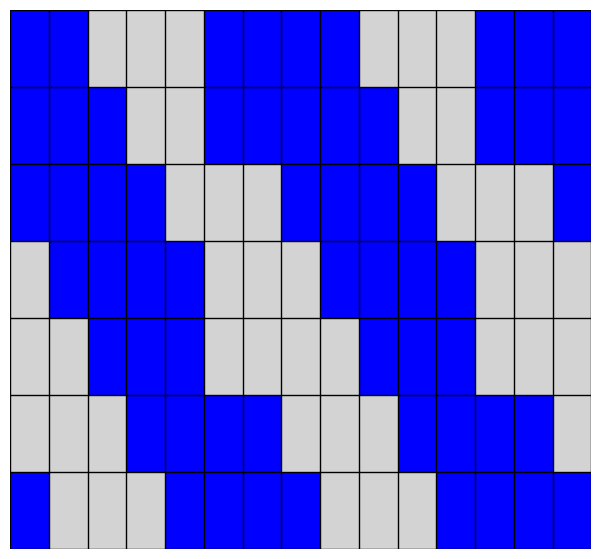

In [9]:
bar.render()

# Test parameter fit

In [10]:
from Classes.parameter_recovery import ParameterFit

In [11]:
# Create paths for data and results
data_folder = Path('..', 'data', 'human')
folder_2P = Path('..', 'reports', 'MLE')
folder_2P.mkdir(parents=True, exist_ok=True)

file_name = f'best_fit_2P_3.json'
best_fit_file_2P = Path(folder_2P, file_name)

In [12]:
#Load 2P data

file_name = '2-player-UR.csv'
file = data_folder / Path(file_name)
print(f'Loading data from {file}...')
data = pd.read_csv(file)
data.head(2)

Loading data from ..\data\human\2-player-UR.csv...


,source,treatment,group,round,player,choice,score,attendance,ac_score,threshold,num_players,room,decision
0,human,score + grid,Grupo-0001,1,405186428721292,0,0,1,25,0.5,2,Grupo-0001,0
1,human,score + grid,Grupo-0001,1,728608683559397,1,1,1,25,0.5,2,Grupo-0001,1


In [13]:
# check_out_these = ['Attendance-M2', 'MFP-M2', 'Payoff-M2']
my_models = [FocalRegionAgent]

ParameterFit.run(
    data=data,
    model_list=my_models,
    best_fit_path=best_fit_file_2P,
    new_file=False
)

Fitting models...:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting data to model FRA...
Creating parameter recovery class...
Running bayesian optimizer...
Finding deviance for 2 players and threshold 0.5...
|   iter    |  target   | invers... | len_hi... | max_re... |
-------------------------------------------------------------
| 1         | -12334.67 | 27.272386 | 1.7203244 | 1.0010293 |
| 2         | -12334.67 | 20.046952 | 1.1467558 | 1.8310473 |
| 3         | -11960.16 | 12.734393 | 1.3455607 | 4.5709072 |
| 4         | -12334.67 | 34.945454 | 1.4191945 | 7.1669755 |
| 5         | -12334.67 | 13.880491 | 1.8781174 | 1.2464883 |
| 6         | -12334.67 | 43.239453 | 1.4173048 | 6.0282084 |
| 7         | -10962.37 | 9.8443771 | 1.1981014 | 8.2067011 |
| 8         | -12334.67 | 62.000479 | 1.3134241 | 7.2309035 |
| 9         | -10216.40 | 7.6414502 | 1.0       | 10.0      |
| 10        | -3134.240 | 1.0       | 1.0       | 10.0      |
| 11        | -2875.510 | 1.0       | 2.0       | 5.9629482 |
| 12        | -3134.240 | 1.0       | 1.0     

Fitting models...: 100%|██████████| 1/1 [00:30<00:00, 30.26s/it]

| 24        | -2875.510 | 1.0       | 2.0       | 7.6809372 |
Optimal parameters for 2 players and threshold 0.5:
{'inverse_temperature': np.float64(1.0), 'len_history': np.float64(2.0), 'max_regions': np.float64(5.962948231613764)}
Deviance: -2875.51008473207
AIC: 5757.02016946414
--------------------------------------------------
